<a href="https://colab.research.google.com/github/vkodithala/NRG/blob/main/NRG_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.3.5


,Unnamed: 0,StateCodes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,TotalPrice2010,POPESTIMATE2010,POPESTIMATE2011,...,RNETMIG2013,RNETMIG2014,TotalPrice2012,TotalPrice2013,TotalPrice2014,TotalC2010.2014,Pop_Estimate,efficient,inefficient,average
0,0,AL,1931522,1905207,1879716,1919365,1958221,17.82,4785822,4801695,...,4817484,4817484,19.96,19.02,18.64,9594031,4807993.8,0,0,1
1,1,AK,653221,653637,649341,621107,603119,20.13,713856,722572,...,731081,731081,25.09,24.60,24.43,3180425,725934.2,1,0,0
2,2,AZ,1383531,1424944,1395839,1414383,1422590,22.25,2922297,2938430,...,2949300,2949300,26.41,26.05,25.94,7041287,2941725.4,0,0,1
3,3,AR,1120632,1122544,1067642,1096438,1114409,16.90,6411999,6472867,...,6556236,6556236,19.98,19.54,18.87,5521665,6510714.8,0,0,1
4,4,CA,7760629,7777115,7564063,7665241,7620082,20.97,37336011,37701901,...,38062780,38062780,24.97,24.85,25.31,38387130,37845250.4,0,1,0
5,5,CO,1513547,1470445,1440781,1470844,1477177,17.40,5048575,5119661,...,5191709,5191709,21.81,21.14,21.25,7372794,5148672.6,0,0,1
6,6,CT,764970,739130,725019,754901,750019,25.62,3579345,3590537,...,3594362,3594362,28.66,27.69,27.84,3734039,3590593.6,0,0,1
7,7,DE,250212,272568,273728,273716,274013,23.50,899731,907829,...,916881,916881,24.83,24.28,23.77,1344237,911640.6,1,0,0
8,8,FL,4282673,4141711,4029903,4076406,4121680,22.05,18852220,19107900,...,19355257,19355257,25.56,25.13,24.91,20652373,19205178.2,0,1,0
9,9,GA,3100144,2982837,2767491,2782782,2850990,18.25,9714464,9813201,...,9919000,9919000,21.73,21.37,20.95,14484244,9856933.0,0,1,0


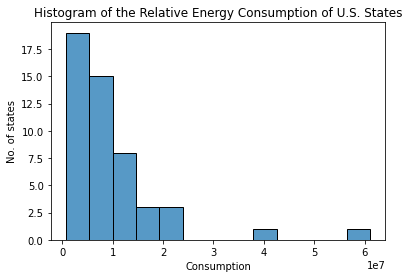

In [46]:
import pandas as pd
print(pd.__version__)

#importing .csv dataset from GitHub to Google Colab
url = 'https://raw.githubusercontent.com/vkodithala/NRG/main/Energy%20Census%20and%20Economic%20Data%20US%202010-2014%202.csv?token=GHSAT0AAAAAAB2CFVCG3K5LQAX5YWQIS3Y4Y2O4URA'
df = pd.read_csv(url)
df

#isolating the features pertinent to our project
relevantdf = df[['StateCodes','TotalC2010', 'TotalC2011','TotalC2012','TotalC2013']]
relevantdf = relevantdf[0:51]
relevantdf

#checking which rows are missing values...
df.isnull().sum()

#dropping irrelevant rows (D.C. and US)
df = df.drop(50)
df = df.drop(51)

#creating population and netmig variables to be called later
pop_2010 = df['POPESTIMATE2010']
pop_2011 = df['POPESTIMATE2011']
pop_2012 = df['POPESTIMATE2012']
pop_2013 = df['POPESTIMATE2012']
pop_2014 = df['POPESTIMATE2012']
netmig_2011 = df['RNETMIG2011']
netmig_2012 = df['RNETMIG2012']
netmig_2013 = df['RNETMIG2013']
netmig_2014 = df['RNETMIG2014']


#dropping irrelevant columns - international & domestic migration rates (have net migration rates)
df = df.drop(['State', 'Region', 'Division', 'Coast', 'Great Lakes', 'RINTERNATIONALMIG2011', 'RINTERNATIONALMIG2012', 'RINTERNATIONALMIG2013', 'RINTERNATIONALMIG2014', 'RDOMESTICMIG2011', 'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014'], axis = 1)

#dropping irrelevant columns - total energy production & expenditures
df = df.drop(['TotalP2010', 'TotalP2011', 'TotalP2012', 'TotalP2013', 'TotalP2014', 'TotalE2010', 'TotalE2011', 'TotalE2012', 'TotalE2013', 'TotalE2014'], axis = 1)

#dropping all other columns - only reviewing total energy consumption & comparing it with states' populations, net population change, energy price, and region
n = 158
df.drop(columns = df.columns[-n:], axis = 1, inplace = True)
df

#adding back population and netmig columns
df.insert(loc=7, column='POPESTIMATE2010', value=pop_2010)
df.insert(loc=8, column='POPESTIMATE2011', value=pop_2011)
df.insert(loc=9, column='POPESTIMATE2012', value=pop_2012)
df.insert(loc=10, column='POPESTIMATE2013', value=pop_2013)
df.insert(loc=11, column='POPESTIMATE2014', value=pop_2014)
df.insert(loc=13, column='RNETMIG2011', value=pop_2011)
df.insert(loc=14, column='RNETMIG2012', value=pop_2012)
df.insert(loc=15, column='RNETMIG2013', value=pop_2013)
df.insert(loc=16, column='RNETMIG2014', value=pop_2014)

#converting our cleaned dataset to a .csv file
df.to_csv('clean_NRG_data.csv')
df = pd.read_csv('clean_NRG_data.csv')
df

#importing numpy and ignoring all warning messages
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#creating a column that shows the energy consumption of all 50 states for the years 2010-2014
df['TotalC2010.2014'] = df['TotalC2010'] + df['TotalC2011'] + df['TotalC2012'] + df['TotalC2013'] + df['TotalC2014']
df['Pop_Estimate'] = (df['POPESTIMATE2010'] + df['POPESTIMATE2011'] + df['POPESTIMATE2012'] + df['POPESTIMATE2013'] + df['POPESTIMATE2014'])/5


#variable declarations
dataset = df['TotalC2010.2014']


#finding the 25th percentile for energy consumption in the years 2010-2014
df_total = dataset
lower_quartile = df_total.quantile(0.25)

#creating a column that shows which states were in the lower quartile for energy consumption for the years 2010-2014
df['efficient'] = 1
df['efficient'].where(dataset <= lower_quartile, 0, inplace=True)

#creating a column that shows which states were in the upper quartile for energy consumption for the years 2010-2014
upper_quartile = df_total.quantile(0.75)
df['inefficient'] = 1
df['inefficient'].where(dataset >= upper_quartile, 0, inplace=True)

#creating a column that shows which states had above avg. efficiency for the years 2010-2014
df['average'] = 1
df['average'].where(dataset < upper_quartile, 0, inplace=True)
df['average'].where(dataset > lower_quartile, 0, inplace=True)
df

#importing matplotlib and seaborn for later usage
import matplotlib.pyplot as plt
import seaborn as sns

#creating a histogram using seaborn
totalc = df['TotalC2010.2014']
sns.histplot(totalc).set(xlabel = "Consumption", ylabel = "No. of states", title = "Histogram of the Relative Energy Consumption of U.S. States")

df




